 

    Project title / Motivation
    Data details:
        Summary statistics
        Challenges
        Data augmentation ( if planned)
        EDA / Data preprocessing ( if done)
    ML pipeline setup
        Train test split
        Choice of models and baselines
        Evaluation metrics
    Plan for the rest of the project and task distributions
    Any misc item that you want to docuss

# Project Title: Detecting Image Manipulation 

# Data Details

**Old dataset:**
- https://www.kaggle.com/datasets/ciplab/real-and-fake-face-detection
- ~1000 real faces, 1000 fake faces (Photoshopped)

**Potential new datasets:**

If we're open to working with GAN faces (not Photoshopped), then we can try:
- https://www.kaggle.com/datasets/xhlulu/140k-real-and-fake-faces 
This has 70k real faces from the Flickr dataset collected by Nvidia, as well as 70k fake faces sampled from the 1 Million FAKE faces (generated by StyleGAN) - https://www.kaggle.com/datasets/tunguz/1-million-fake-faces 




**summary statistics**
- count of files total
- count of fake faces, count of real faces
- can also do some exploratory analysis on the pixel values of the real vs fake images
- Data augmentation: none currently planned
- EDA / Data preprocessing: standardizing the image sizes, colors, greyscale, removing backgrounds (edge detection), 



# Motivation

If we use GAN generated faces: AI generated faces can be used for the creation of fake online personas for scams, propaganda and online influence campaigns (https://www.npr.org/2022/12/15/1143114122/ai-generated-fake-faces-have-become-a-hallmark-of-online-influence-operations) , and even state espionage (https://apnews.com/article/ap-top-news-artificial-intelligence-social-platforms-think-tanks-politics-bc2f19097a4c4fffaa00de6770b8a60d) 



If we are staying with the Photoshopped faces: This is a relevant problem to address because on social media platforms, such as Instagram, the manipulation of faces can create unrealistic expectations about body image, leading to disorders such as body dysmorphia or eating disorders. Image manipulation can also be used to proliferate misinformation. Thus, websites or public officials may be interested in being able to detect digitally altered images in order to flag them.

If we want to stay with Photoshopped faces:
- There aren't readily available large datasets but we can create our own by using the method outlined in this research paper (https://peterwang512.github.io/FALdetector/) where they used Photoshop scripting to programatically warp images: https://github.com/PeterWang512/FALdetector/issues/3 
- Can use the Flickr dataset to get unmanipulated faces (70k faces: https://www.kaggle.com/datasets/xhlulu/flickrfaceshq-dataset-nvidia-resized-256px) and then manipulate those with the Photoshop warping script above.

**Meeting**:

*   Explore additional model
*   VGG or more (or fine tune the CNN model)
*   compare improvement of accuracy
*   accuracy separately reported (between models, between genders, features that could deceive the model
*   report: result specified (accuracy comparison! baseline, fine-tuned, interesting findings, data visualization. dont only focus on ML)




# ML Pipeline

- split: can use sklearn to create train-test split (I think there was some content in lectures about creating a dev set, train, and test)


Models:
- start with basic NN (https://keras.io/examples/vision/image_classification_from_scratch/ )
- CNN
- Try pretrained image libraries: Resnet-50, FAL warping detection (https://github.com/PeterWang512/FALdetector/issues/3)

evaluation metrics:
- Classification accuracy, confusion matrix
- Also consider the runtime and training time

In [ ]:
import tensorflow as tf
tf.test.gpu_device_name()

'/device:GPU:0'

In [ ]:
!cat /proc/meminfo

MemTotal:       13297192 kB
MemFree:         7026064 kB
MemAvailable:   10976916 kB
Buffers:          327592 kB
Cached:          3789384 kB
SwapCached:            0 kB
Active:           635356 kB
Inactive:        5232884 kB
Active(anon):       1072 kB
Inactive(anon):  1737144 kB
Active(file):     634284 kB
Inactive(file):  3495740 kB
Unevictable:           0 kB
Mlocked:               0 kB
SwapTotal:             0 kB
SwapFree:              0 kB
Dirty:               308 kB
Writeback:             0 kB
AnonPages:       1749464 kB
Mapped:           737276 kB
Shmem:             11648 kB
KReclaimable:     124560 kB
Slab:             166080 kB
SReclaimable:     124560 kB
SUnreclaim:        41520 kB
KernelStack:        4560 kB
PageTables:        23504 kB
NFS_Unstable:          0 kB
Bounce:                0 kB
WritebackTmp:          0 kB
CommitLimit:     6648596 kB
Committed_AS:    3785288 kB
VmallocTotal:   34359738367 kB
VmallocUsed:       76992 kB
VmallocChunk:          0 kB
Percpu:          

In [ ]:
# loading datasets into Colab using Kaggle API: https://www.analyticsvidhya.com/blog/2021/06/how-to-load-kaggle-datasets-directly-into-google-colab/
# Read in data from Kaggle

# add in API keys, only need to do once
# !mkdir ~/.kaggle
# !cp kaggle.json ~/.kaggle/
# !chmod 600 ~/.kaggle/kaggle.json

# import kaggle
# !kaggle datasets download -d xhlulu/140k-real-and-fake-faces
# !unzip 140k-real-and-fake-faces.zip

In [ ]:
# Read data from Google Drive
from google.colab import drive
drive.mount('/content/gdrive/')


Mounted at /content/gdrive/


In [ ]:
# if you get an error, pin the Info 251 Project folder in your Drive first
# (in Google Drive > Shared with Me > right click "Info 251 Project" > Add shortcut to Drive)
%cd /content/gdrive/MyDrive/Info 251 Project/
!ls

/content/gdrive/MyDrive/Info 251 Project
 A.Ibarra_Analysis.ipynb	       kaggle.json
 Alberto_model			       photoshop_dataset.zip
 Analysis_Work.ipynb		      'Project Write-Up.gdoc'
 data				       sample_code
 faces_data.zip			       test.csv
'Final Project Presentation.gslides'   test.zip
'Jared Analysis.ipynb'		       train.csv
 jared_model			      'valid (1).csv'
'JC Analysis Checkpoint1.ipynb'        valid.csv
'JC Analysis.ipynb'		       valid.zip
 jonathan_model


In [ ]:
# save the zip from GDrive to local VM (unzipped), takes ~1.5 min
!unzip faces_data.zip -d /content/

# set working directory to '/content'
%cd /content

Streaming output truncated to the last 5000 lines.
  inflating: /content/real_vs_fake/real-vs-fake/valid/real/34836.jpg  
  inflating: /content/real_vs_fake/real-vs-fake/valid/real/34839.jpg  
  inflating: /content/real_vs_fake/real-vs-fake/valid/real/34847.jpg  
  inflating: /content/real_vs_fake/real-vs-fake/valid/real/34848.jpg  
  inflating: /content/real_vs_fake/real-vs-fake/valid/real/34852.jpg  
  inflating: /content/real_vs_fake/real-vs-fake/valid/real/34861.jpg  
  inflating: /content/real_vs_fake/real-vs-fake/valid/real/34864.jpg  
  inflating: /content/real_vs_fake/real-vs-fake/valid/real/34868.jpg  
  inflating: /content/real_vs_fake/real-vs-fake/valid/real/34877.jpg  
  inflating: /content/real_vs_fake/real-vs-fake/valid/real/34883.jpg  
  inflating: /content/real_vs_fake/real-vs-fake/valid/real/34887.jpg  
  inflating: /content/real_vs_fake/real-vs-fake/valid/real/34891.jpg  
  inflating: /content/real_vs_fake/real-vs-fake/valid/real/34894.jpg  
  inflating: /content/real

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import os
import glob

In [ ]:
# From the original 140k images, we use the 20k images found in the test folder
data= pd.read_csv('test.csv')
data.head()

,Unnamed: 0,original_path,id,label,label_str,path
0,0,/kaggle/input/flickrfaceshq-dataset-nvidia-par...,18233,1,real,test/real/18233.jpg
1,1,/kaggle/input/flickrfaceshq-dataset-nvidia-par...,54317,1,real,test/real/54317.jpg
2,2,/kaggle/input/flickrfaceshq-dataset-nvidia-par...,40155,1,real,test/real/40155.jpg
3,3,/kaggle/input/flickrfaceshq-dataset-nvidia-par...,12875,1,real,test/real/12875.jpg
4,4,/kaggle/input/flickrfaceshq-dataset-nvidia-par...,52543,1,real,test/real/52543.jpg


In [ ]:
data["label_str"]

0        real
1        real
2        real
3        real
4        real
         ... 
19995    fake
19996    fake
19997    fake
19998    fake
19999    fake
Name: label_str, Length: 20000, dtype: object

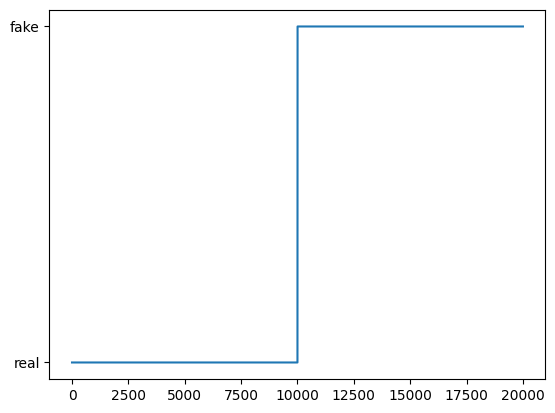

In [ ]:
plt.plot(data["label_str"])
plt.show()

In [ ]:
data.value_counts("label_str")

label_str
fake    10000
real    10000
dtype: int64

In [ ]:
!pwd
%cd data

/content
[Errno 2] No such file or directory: 'data'
/content


In [ ]:
workdir= os.listdir()
if '.DS_Store' in workdir:
   workdir.remove('.DS_Store')

workdir

['.config',
 'test.csv',
 'train.csv',
 'valid.csv',
 'real_vs_fake',
 'gdrive',
 'sample_data']

In [ ]:
workdir=['']

In [ ]:
# dataset = {"image_path":[],"image_name":[],"image_folder":[]}
# for folder in workdir:
#     for name in os.listdir(folder):
#           dataset["image_path"].append(os.getcwd()+ "/" + folder + "/" + name)
#           dataset["image_name"].append(name)
#           dataset["image_folder"].append(folder)
# dataset = pd.DataFrame(dataset)
# dataset

# plt.figure(figsize = (10,10))
# for i in range(9):
#     random = np.random.randint(1,len(dataset))
#     plt.subplot(3,3,i+1)
#     plt.imshow(plt.imread(dataset.loc[random,"image_path"]))
#     plt.title(dataset.loc[random, "image_folder"], size = 10) 
    
# plt.show()

In [ ]:
%cd /content
dataset= pd.read_csv('test.csv')
dataset.head()

/content


,Unnamed: 0,original_path,id,label,label_str,path
0,0,/kaggle/input/flickrfaceshq-dataset-nvidia-par...,18233,1,real,test/real/18233.jpg
1,1,/kaggle/input/flickrfaceshq-dataset-nvidia-par...,54317,1,real,test/real/54317.jpg
2,2,/kaggle/input/flickrfaceshq-dataset-nvidia-par...,40155,1,real,test/real/40155.jpg
3,3,/kaggle/input/flickrfaceshq-dataset-nvidia-par...,12875,1,real,test/real/12875.jpg
4,4,/kaggle/input/flickrfaceshq-dataset-nvidia-par...,52543,1,real,test/real/52543.jpg


In [ ]:
dataset["label_str"]

0        real
1        real
2        real
3        real
4        real
         ... 
19995    fake
19996    fake
19997    fake
19998    fake
19999    fake
Name: label_str, Length: 20000, dtype: object

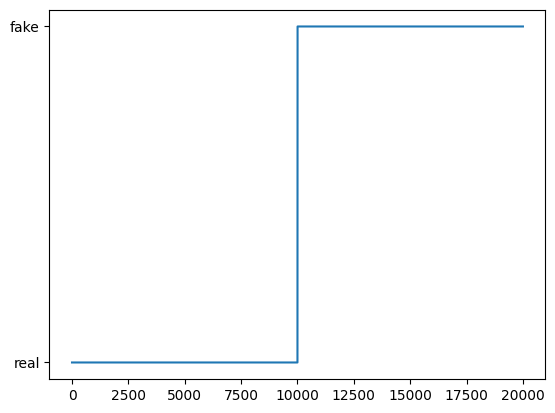

In [ ]:
plt.plot(data["label_str"])
plt.show()

Preprocessed Data: Gray Scale and Standarization

In [ ]:
import numpy as np
from PIL import Image
from sklearn.preprocessing import StandardScaler
scalar = StandardScaler()

In [ ]:
data.value_counts("label_str")

label_str
fake    10000
real    10000
dtype: int64

In [ ]:
!pwd
%cd real_vs_fake/real-vs-fake/test
path = !pwd
path = path[0]

workdir= os.listdir()
if '.DS_Store' in workdir:
   workdir.remove('.DS_Store')

workdir

/content
/content/real_vs_fake/real-vs-fake/test


['fake', 'real']

In [ ]:
dataset = {"image_path":[],"image_name":[],"image_folder":[]}
for folder in workdir:
    for name in os.listdir(folder):
          dataset["image_path"].append(os.getcwd()+ "/" + folder + "/" + name)
          dataset["image_name"].append(name)
          dataset["image_folder"].append(folder)
df = pd.DataFrame(dataset)
df

,image_path,image_name,image_folder
0,/content/real_vs_fake/real-vs-fake/test/fake/4...,4YC94909LU.jpg,fake
1,/content/real_vs_fake/real-vs-fake/test/fake/W...,WSI88DN7MA.jpg,fake
2,/content/real_vs_fake/real-vs-fake/test/fake/V...,V3VVR7MDGG.jpg,fake
3,/content/real_vs_fake/real-vs-fake/test/fake/L...,LGALSTE0HE.jpg,fake
4,/content/real_vs_fake/real-vs-fake/test/fake/W...,W5Q7BW95TZ.jpg,fake
...,...,...,...
19995,/content/real_vs_fake/real-vs-fake/test/real/6...,60579.jpg,real
19996,/content/real_vs_fake/real-vs-fake/test/real/0...,08350.jpg,real
19997,/content/real_vs_fake/real-vs-fake/test/real/3...,34173.jpg,real
19998,/content/real_vs_fake/real-vs-fake/test/real/2...,29512.jpg,real


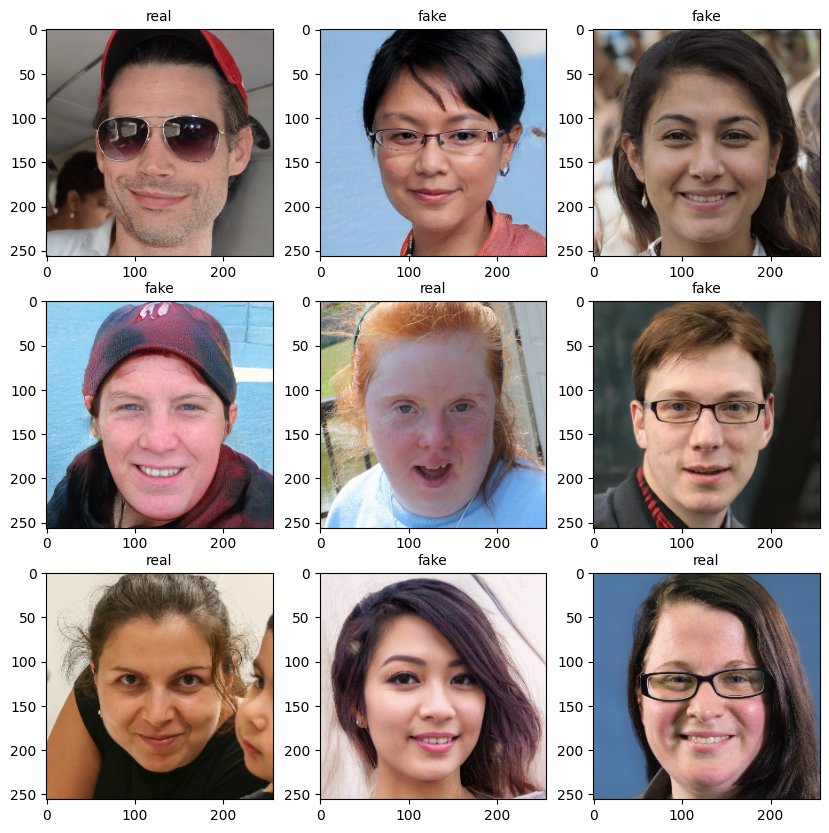

In [ ]:
plt.figure(figsize = (10,10))
for i in range(9):
    random = np.random.randint(1,len(df))
    plt.subplot(3,3,i+1)
    plt.imshow(plt.imread(df.loc[random,"image_path"]))
    plt.title(df.loc[random, "image_folder"], size = 10) 
    
plt.show()

In [ ]:
path = !pwd
path[0]

'/content/real_vs_fake/real-vs-fake/test'

In [ ]:
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D, AveragePooling2D
from keras.optimizers import Adam
from keras.layers import LeakyReLU

In [ ]:
path = !pwd
path = path[0]

image_gen = ImageDataGenerator(
    validation_split=0.1
)

train_generator = image_gen.flow_from_directory(
    path,
    target_size=(128, 128),
    batch_size=25,
    color_mode='grayscale',
    class_mode ='binary',
    subset='training'
)

validation_generator = image_gen.flow_from_directory(
    path,
    target_size=(128, 128),
    batch_size=25,
    color_mode='grayscale',
    class_mode ='binary',
    #classes=['fake','real'],
    subset='validation')

Found 18000 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.


In [ ]:
len(train_generator)

720

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout

In [ ]:
FNN_model = Sequential()
FNN_model.add(Flatten(input_shape=(128,128,1)))
FNN_model.add(Dense(units =128, activation='relu'))
FNN_model.add(Dense(units = 1, activation='sigmoid'))

In [ ]:
FNN_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy']) 

In [ ]:
FNN_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 16384)             0         
                                                                 
 dense (Dense)               (None, 128)               2097280   
                                                                 
 dense_1 (Dense)             (None, 1)                 129       
                                                                 
Total params: 2,097,409
Trainable params: 2,097,409
Non-trainable params: 0
_________________________________________________________________


In [ ]:
FNN_history=FNN_model.fit(
        train_generator,
        steps_per_epoch= train_generator.samples // train_generator.batch_size,
        epochs=10,
        validation_data=validation_generator,
        validation_steps = validation_generator.samples // validation_generator.batch_size)

Epoch 1/10
720/720 [==============================] - 56s 70ms/step - loss: 19.9533 - accuracy: 0.5939 - val_loss: 1.9598 - val_accuracy: 0.6180
Epoch 2/10
720/720 [==============================] - 37s 51ms/step - loss: 0.8332 - accuracy: 0.6751 - val_loss: 0.5514 - val_accuracy: 0.7210
Epoch 3/10
720/720 [==============================] - 37s 51ms/step - loss: 0.5744 - accuracy: 0.7029 - val_loss: 0.5526 - val_accuracy: 0.7170
Epoch 4/10
720/720 [==============================] - 38s 53ms/step - loss: 0.5741 - accuracy: 0.7000 - val_loss: 0.5578 - val_accuracy: 0.7095
Epoch 5/10
720/720 [==============================] - 38s 53ms/step - loss: 0.5927 - accuracy: 0.6832 - val_loss: 0.5681 - val_accuracy: 0.6990
Epoch 6/10
720/720 [==============================] - 38s 53ms/step - loss: 0.6455 - accuracy: 0.6048 - val_loss: 0.6968 - val_accuracy: 0.5010
Epoch 7/10
720/720 [==============================] - 37s 52ms/step - loss: 0.6946 - accuracy: 0.5000 - val_loss: 0.6934 - val_accuracy

In [ ]:
FNN_model_history = pd.DataFrame(FNN_model.history.history)
FNN_model_history

,loss,accuracy,val_loss,val_accuracy
0,19.953274,0.593889,1.959788,0.6180
1,0.833154,0.675111,0.551404,0.7210
2,0.574405,0.702889,0.552581,0.7170
3,0.574087,0.700000,0.557781,0.7095
4,0.592678,0.683167,0.568075,0.6990
5,0.645539,0.604778,0.696791,0.5010
6,0.694613,0.500000,0.693426,0.5000
7,0.693277,0.500000,0.693159,0.5000
8,0.693198,0.495778,0.693147,0.5000
9,0.693186,0.497611,0.693152,0.5000


In [ ]:
# FNN_model_history['accuracy'].mean()
# FNN_model_history['val_accuracy']

0    0.6180
1    0.7210
2    0.7170
3    0.7095
4    0.6990
5    0.5010
6    0.5000
7    0.5000
8    0.5000
9    0.5000
Name: val_accuracy, dtype: float64

Text(0.5, 1.0, 'Accuracy Per Epoch')

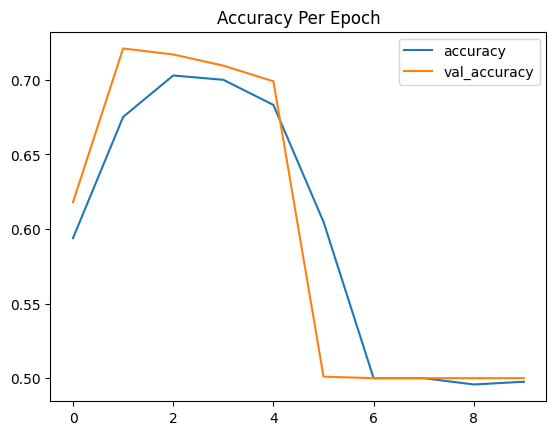

In [ ]:
FNN_model_history[['accuracy','val_accuracy']].plot()
plt.title('Accuracy Per Epoch')

Text(0.5, 1.0, 'Loss Per Epoch')

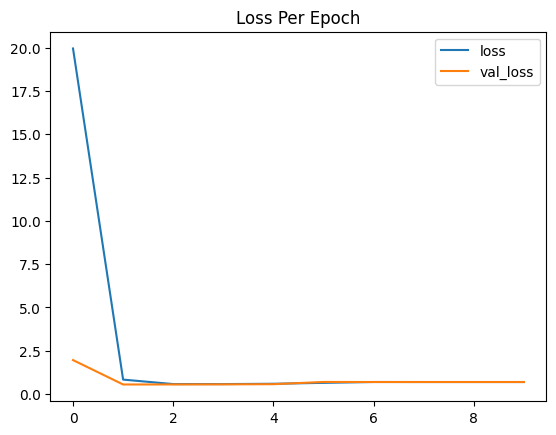

In [ ]:
FNN_model_history[['loss','val_loss']].plot()
plt.title('Loss Per Epoch')

In [ ]:
# Save model for later
%cd /content/gdrive/MyDrive/Info 251 Project/Alberto_model/
FNN_model.save('alberto_fnnmodel1.h5')
FNN_model_pd = pd.DataFrame(FNN_history.history)
FNN_model_pd.to_csv("/content/gdrive/MyDrive/Info 251 Project/Alberto_model/FNN_model_pd.csv")
%cd /content/real_vs_fake/real-vs-fake/test

/content/gdrive/MyDrive/Info 251 Project/Alberto_model
/content/real_vs_fake/real-vs-fake/test


In [ ]:
# create the test generator

path = '/content/real_vs_fake/real-vs-fake/valid'

image_gen_test = ImageDataGenerator(
    validation_split=0.1
)

throwaway_generator = image_gen_test.flow_from_directory(
    path,
    target_size=(128, 128),
    batch_size=25,
    color_mode='grayscale',
    class_mode ='binary',
    shuffle=False,
    subset='training'
)

test_generator = image_gen_test.flow_from_directory(
    path,
    target_size=(128, 128),
    batch_size=1,
    color_mode='grayscale',
    class_mode ='binary',
    shuffle= False,
    subset='validation')

Found 18000 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.


In [ ]:
y_pred = FNN_model.predict(test_generator)
y_test = test_generator.classes

NameError: ignored

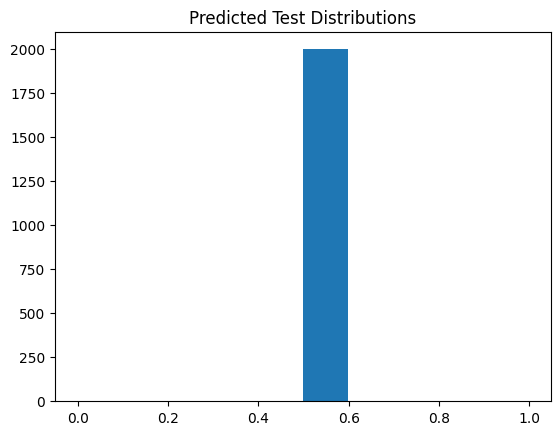

In [ ]:
plt.hist(y_pred)
plt.title('Predicted Test Distributions')
plt.show()

In [ ]:
from sklearn import metrics
print(metrics.classification_report(y_test, y_pred > 0.5))

              precision    recall  f1-score   support

           0       0.50      1.00      0.67      1000
           1       0.00      0.00      0.00      1000

    accuracy                           0.50      2000
   macro avg       0.25      0.50      0.33      2000
weighted avg       0.25      0.50      0.33      2000



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


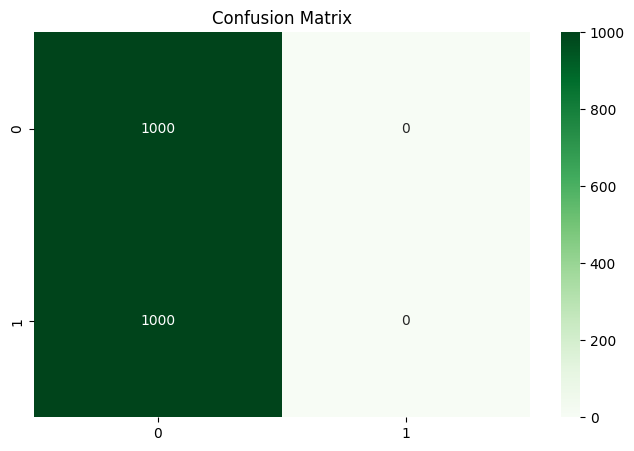

In [ ]:
plt.figure(figsize = (8,5))
sns.heatmap(metrics.confusion_matrix(y_test, y_pred.round()), annot = True,fmt="d",cmap = "Greens")
plt.title('Confusion Matrix')
plt.show()

In [ ]:
256*2


512

In [ ]:
dense_layers=np.array([32,64,128,256,512])
loss = np.array([])
accuracy = np.array([])
val_loss = np.array([])
val_accuracy = np.array([])
for i in dense_layers:
  FNN_model = Sequential()
  FNN_model.add(Flatten(input_shape=(128,128,1)))
  FNN_model.add(Dense(units =i, activation='relu'))
  FNN_model.add(Dense(units = 1, activation='sigmoid'))
  FNN_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy']) 
  FNN_history=FNN_model.fit(
        train_generator,
        steps_per_epoch= train_generator.samples // train_generator.batch_size,
        epochs=10,
        validation_data=validation_generator,
        validation_steps = validation_generator.samples // validation_generator.batch_size)
  FNN_model_history = pd.DataFrame(FNN_model.history.history)

  loss = np.append(loss, FNN_model_history['loss'].mean())
  accuracy = np.append(accuracy, FNN_model_history['accuracy'].mean())
  val_loss =  np.append(val_loss, FNN_model_history['val_loss'].mean())
  val_accuracy = np.append(val_accuracy, FNN_model_history['val_accuracy'].mean())
  print(loss)
  print(accuracy)
  print(val_loss)
  print(val_accuracy)




Epoch 1/10
720/720 [==============================] - 40s 54ms/step - loss: 7.6798 - accuracy: 0.4985 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 2/10
720/720 [==============================] - 39s 54ms/step - loss: 0.6932 - accuracy: 0.4987 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 3/10
720/720 [==============================] - 43s 60ms/step - loss: 0.6932 - accuracy: 0.4979 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 4/10
720/720 [==============================] - 37s 52ms/step - loss: 0.6932 - accuracy: 0.4967 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 5/10
720/720 [==============================] - 39s 53ms/step - loss: 0.6932 - accuracy: 0.4982 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 6/10
720/720 [==============================] - 43s 59ms/step - loss: 0.6932 - accuracy: 0.4904 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 7/10
720/720 [==============================] - 39s 54ms/step - loss: 0.6932 - accuracy: 0.4922 - val_loss: 0.6931 - val_accuracy:

In [ ]:
loss

array([ 1.39185026,  3.53563399, 10.75340028, 10.97748016, 16.73355109])

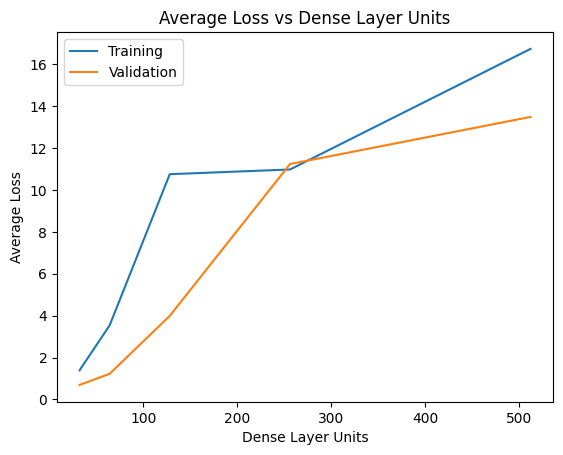

In [ ]:
plt.plot(dense_layers,loss)
plt.plot(dense_layers,val_loss)
plt.title('Average Loss vs Dense Layer Units')
plt.xlabel('Dense Layer Units')
plt.ylabel('Average Loss')
plt.legend(['Training','Validation'])

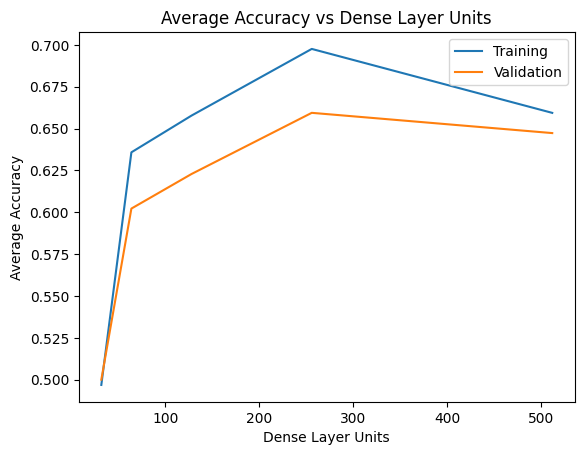

In [ ]:
plt.plot(dense_layers,accuracy)
plt.plot(dense_layers,val_accuracy)
plt.title('Average Accuracy vs Dense Layer Units')
plt.xlabel('Dense Layer Units')
plt.ylabel('Average Accuracy')
plt.legend(['Training','Validation'])

In [ ]:
epochs_amount=np.array([1,5,10,15,20])
loss = np.array([])
accuracy = np.array([])
val_loss = np.array([])
val_accuracy = np.array([])
for i in epochs_amount:
  FNN_model = Sequential()
  FNN_model.add(Flatten(input_shape=(128,128,1)))
  FNN_model.add(Dense(units =256, activation='relu'))
  FNN_model.add(Dense(units = 1, activation='sigmoid'))
  FNN_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy']) 
  FNN_history=FNN_model.fit(
        train_generator,
        steps_per_epoch= train_generator.samples // train_generator.batch_size,
        epochs=i,
        validation_data=validation_generator,
        validation_steps = validation_generator.samples // validation_generator.batch_size)
  FNN_model_history = pd.DataFrame(FNN_model.history.history)

  loss = np.append(loss, FNN_model_history['loss'].mean())
  accuracy = np.append(accuracy, FNN_model_history['accuracy'].mean())
  val_loss =  np.append(val_loss, FNN_model_history['val_loss'].mean())
  val_accuracy = np.append(val_accuracy, FNN_model_history['val_accuracy'].mean())
  print(loss)
  print(accuracy)
  print(val_loss)
  print(val_accuracy)

720/720 [==============================] - 41s 55ms/step - loss: 59.4193 - accuracy: 0.5841 - val_loss: 7.7369 - val_accuracy: 0.6560
[59.41934204]
[0.58405554]
[7.73687124]
[0.65600002]
Epoch 1/5
720/720 [==============================] - 40s 55ms/step - loss: 143.6672 - accuracy: 0.5792 - val_loss: 75.0541 - val_accuracy: 0.5975
Epoch 2/5
720/720 [==============================] - 37s 52ms/step - loss: 25.7513 - accuracy: 0.6413 - val_loss: 6.7746 - val_accuracy: 0.7005
Epoch 3/5
720/720 [==============================] - 38s 53ms/step - loss: 6.0635 - accuracy: 0.6809 - val_loss: 2.9532 - val_accuracy: 0.6065
Epoch 4/5
720/720 [==============================] - 37s 52ms/step - loss: 0.8307 - accuracy: 0.7279 - val_loss: 0.6339 - val_accuracy: 0.7025
Epoch 5/5
720/720 [==============================] - 39s 55ms/step - loss: 0.5480 - accuracy: 0.7459 - val_loss: 0.5198 - val_accuracy: 0.7505
[59.41934204 35.37212908]
[0.58405554 0.67504444]
[ 7.73687124 17.187107  ]
[0.65600002 0.6715

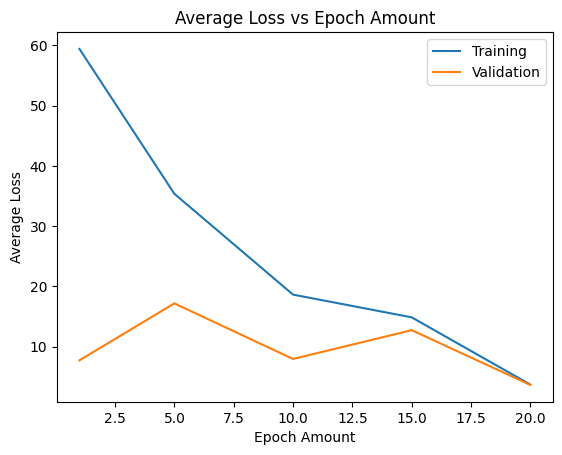

In [ ]:
plt.plot(epochs_amount,loss)
plt.plot(epochs_amount,val_loss)
plt.title('Average Loss vs Epoch Amount')
plt.xlabel('Epoch Amount')
plt.ylabel('Average Loss')
plt.legend(['Training','Validation'])

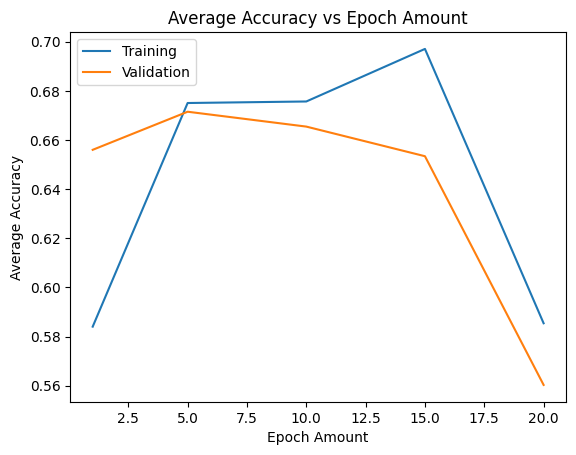

In [ ]:
plt.plot(epochs_amount,accuracy)
plt.plot(epochs_amount,val_accuracy)
plt.title('Average Accuracy vs Epoch Amount')
plt.xlabel('Epoch Amount')
plt.ylabel('Average Accuracy')
plt.legend(['Training','Validation'])

In [ ]:
learning_rate=np.array([0.01,0.001,0.0001])
loss = np.array([])
accuracy = np.array([])
val_loss = np.array([])
val_accuracy = np.array([])
for i in learning_rate:
  FNN_model = Sequential()
  FNN_model.add(Flatten(input_shape=(128,128,1)))
  FNN_model.add(Dense(units =256, activation='relu'))
  FNN_model.add(Dense(units = 1, activation='sigmoid'))
  opt = Adam(learning_rate=i)
  FNN_model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy']) 
  FNN_history=FNN_model.fit(
        train_generator,
        steps_per_epoch= train_generator.samples // train_generator.batch_size,
        epochs=15,
        validation_data=validation_generator,
        validation_steps = validation_generator.samples // validation_generator.batch_size)
  FNN_model_history = pd.DataFrame(FNN_model.history.history)

  loss = np.append(loss, FNN_model_history['loss'].mean())
  accuracy = np.append(accuracy, FNN_model_history['accuracy'].mean())
  val_loss =  np.append(val_loss, FNN_model_history['val_loss'].mean())
  val_accuracy = np.append(val_accuracy, FNN_model_history['val_accuracy'].mean())
  print(loss)
  print(accuracy)
  print(val_loss)
  print(val_accuracy)

Epoch 1/15
720/720 [==============================] - 39s 53ms/step - loss: 228.4835 - accuracy: 0.6212 - val_loss: 0.6884 - val_accuracy: 0.6300
Epoch 2/15
720/720 [==============================] - 38s 53ms/step - loss: 0.5845 - accuracy: 0.6971 - val_loss: 0.6202 - val_accuracy: 0.6750
Epoch 3/15
720/720 [==============================] - 40s 55ms/step - loss: 0.5793 - accuracy: 0.7013 - val_loss: 0.6033 - val_accuracy: 0.6960
Epoch 4/15
720/720 [==============================] - 38s 53ms/step - loss: 0.5962 - accuracy: 0.6905 - val_loss: 0.8065 - val_accuracy: 0.4995
Epoch 5/15
720/720 [==============================] - 37s 51ms/step - loss: 0.6746 - accuracy: 0.5657 - val_loss: 0.6954 - val_accuracy: 0.4995
Epoch 6/15
720/720 [==============================] - 38s 53ms/step - loss: 0.6930 - accuracy: 0.4996 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 7/15
720/720 [==============================] - 38s 53ms/step - loss: 0.6934 - accuracy: 0.5009 - val_loss: 0.6940 - val_accurac

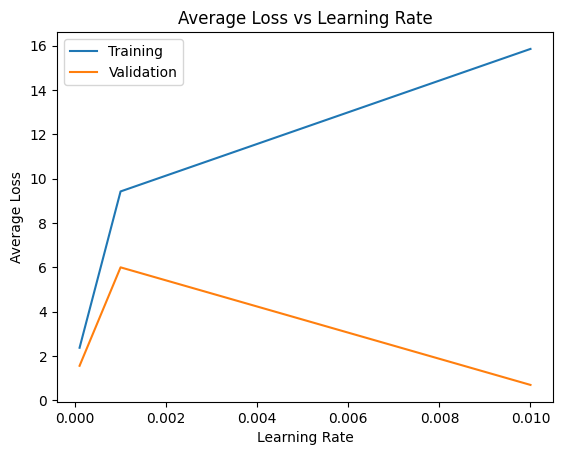

In [ ]:
plt.plot(learning_rate,loss)
plt.plot(learning_rate,val_loss)
plt.title('Average Loss vs Learning Rate')
plt.xlabel('Learning Rate')
plt.ylabel('Average Loss')
plt.legend(['Training','Validation'])

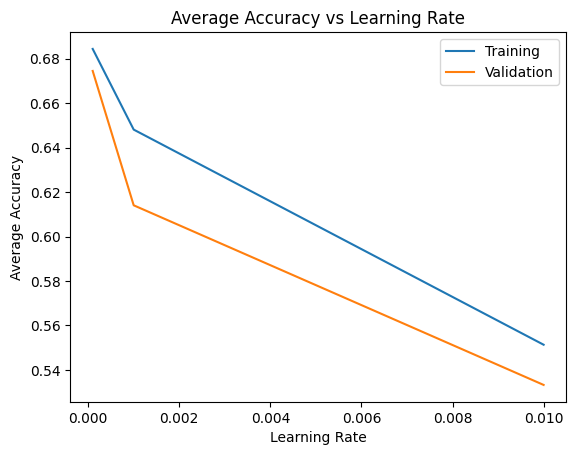

In [ ]:
plt.plot(learning_rate,accuracy)
plt.plot(learning_rate,val_accuracy)
plt.title('Average Accuracy vs Learning Rate')
plt.xlabel('Learning Rate')
plt.ylabel('Average Accuracy')
plt.legend(['Training','Validation'])

In [ ]:
FNN_model1 = Sequential()
FNN_model1.add(Flatten(input_shape=(128,128,1)))
FNN_model1.add(Dense(units =128, activation='relu'))
FNN_model1.add(Dense(units = 1, activation='sigmoid'))
opt = Adam(learning_rate=0.001)
FNN_model1.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy']) 
FNN_history1=FNN_model1.fit(
        train_generator,
        steps_per_epoch= train_generator.samples // train_generator.batch_size,
        epochs=10,
        validation_data=validation_generator,
        validation_steps = validation_generator.samples // validation_generator.batch_size)


# Save model for later
# %cd /content/gdrive/MyDrive/Info 251 Project/Alberto_model/
# FNN_model1.save('alberto_fnnmodel11.h5')
# FNN_model_pd1 = pd.DataFrame(FNN_history1.history)
# FNN_model_pd1.to_csv("/content/gdrive/MyDrive/Info 251 Project/Alberto_model/FNN_model_pd1.csv")
# %cd /content/real_vs_fake/real-vs-fake/test

Epoch 1/10
720/720 [==============================] - 64s 88ms/step - loss: 58.3210 - accuracy: 0.5766 - val_loss: 34.3920 - val_accuracy: 0.5920
Epoch 2/10
720/720 [==============================] - 67s 94ms/step - loss: 22.0317 - accuracy: 0.6382 - val_loss: 8.1321 - val_accuracy: 0.6990
Epoch 3/10
720/720 [==============================] - 61s 85ms/step - loss: 18.7944 - accuracy: 0.6443 - val_loss: 6.3136 - val_accuracy: 0.7115
Epoch 4/10
720/720 [==============================] - 66s 91ms/step - loss: 12.4409 - accuracy: 0.6659 - val_loss: 4.7334 - val_accuracy: 0.7295
Epoch 5/10
720/720 [==============================] - 62s 86ms/step - loss: 7.3586 - accuracy: 0.6838 - val_loss: 4.5823 - val_accuracy: 0.7170
Epoch 6/10
720/720 [==============================] - 66s 92ms/step - loss: 4.7754 - accuracy: 0.6959 - val_loss: 8.1355 - val_accuracy: 0.5570
Epoch 7/10
720/720 [==============================] - 62s 86ms/step - loss: 2.5345 - accuracy: 0.7158 - val_loss: 1.2292 - val_accu

In [ ]:
# Save model for later
%cd /content/gdrive/MyDrive/Info 251 Project/Alberto_model/
FNN_model1.save('alberto_fnnmodel11.h5')
FNN_model_pd1 = pd.DataFrame(FNN_history1.history)
FNN_model_pd1.to_csv("/content/gdrive/MyDrive/Info 251 Project/Alberto_model/FNN_model_pd1.csv")
%cd /content/real_vs_fake/real-vs-fake/test

/content/gdrive/MyDrive/Info 251 Project/Alberto_model
/content/real_vs_fake/real-vs-fake/test


In [ ]:
# create the test generator

path = '/content/real_vs_fake/real-vs-fake/valid'

image_gen_test = ImageDataGenerator(
    validation_split=0.1
)

throwaway_generator = image_gen_test.flow_from_directory(
    path,
    target_size=(128, 128),
    batch_size=25,
    color_mode='grayscale',
    class_mode ='binary',
    shuffle=False,
    subset='training'
)

test_generator = image_gen_test.flow_from_directory(
    path,
    target_size=(128, 128),
    batch_size=1,
    color_mode='grayscale',
    class_mode ='binary',
    shuffle= False,
    subset='validation')

Found 18000 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.


In [ ]:
y_pred = FNN_model1.predict(test_generator)
y_test = test_generator.classes
from sklearn import metrics
print(metrics.classification_report(y_test, y_pred > 0.5))
print("ROC-AUC Score:", metrics.roc_auc_score(y_test, y_pred))
print("AP Score:", metrics.average_precision_score(y_test, y_pred))

2000/2000 [==============================] - 16s 8ms/step
              precision    recall  f1-score   support

           0       0.77      0.63      0.69      1000
           1       0.69      0.82      0.75      1000

    accuracy                           0.72      2000
   macro avg       0.73      0.72      0.72      2000
weighted avg       0.73      0.72      0.72      2000

ROC-AUC Score: 0.7573070000000001
AP Score: 0.6927459993419627


In [ ]:
FNN_model2 = Sequential()
FNN_model2.add(Flatten(input_shape=(128,128,1)))
FNN_model2.add(Dense(units =128, activation='relu'))
FNN_model2.add(Dense(units = 1, activation='sigmoid'))
opt = Adam(learning_rate=0.0001)
FNN_model2.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy']) 
FNN_history2=FNN_model2.fit(
        train_generator,
        steps_per_epoch= train_generator.samples // train_generator.batch_size,
        epochs=10,
        validation_data=validation_generator,
        validation_steps = validation_generator.samples // validation_generator.batch_size)

Epoch 1/10
720/720 [==============================] - 70s 97ms/step - loss: 8.3756 - accuracy: 0.5839 - val_loss: 3.2148 - val_accuracy: 0.6345
Epoch 2/10
720/720 [==============================] - 66s 92ms/step - loss: 3.4123 - accuracy: 0.6268 - val_loss: 5.5987 - val_accuracy: 0.5305
Epoch 3/10
720/720 [==============================] - 68s 94ms/step - loss: 2.3432 - accuracy: 0.6461 - val_loss: 2.0074 - val_accuracy: 0.6355
Epoch 4/10
720/720 [==============================] - 62s 86ms/step - loss: 1.6670 - accuracy: 0.6624 - val_loss: 1.1094 - val_accuracy: 0.6665
Epoch 5/10
720/720 [==============================] - 62s 87ms/step - loss: 1.2607 - accuracy: 0.6688 - val_loss: 1.4901 - val_accuracy: 0.6225
Epoch 6/10
720/720 [==============================] - 61s 85ms/step - loss: 1.3006 - accuracy: 0.6768 - val_loss: 2.3853 - val_accuracy: 0.5535
Epoch 7/10
720/720 [==============================] - 63s 88ms/step - loss: 0.9997 - accuracy: 0.6933 - val_loss: 0.8123 - val_accuracy:

In [ ]:
# Save model for later
%cd /content/gdrive/MyDrive/Info 251 Project/Alberto_model/
FNN_model2.save('alberto_fnnmodel2.h5')
FNN_model_pd2 = pd.DataFrame(FNN_history2.history)
FNN_model_pd2.to_csv("/content/gdrive/MyDrive/Info 251 Project/Alberto_model/FNN_model_pd2.csv")
%cd /content/real_vs_fake/real-vs-fake/test

/content/gdrive/MyDrive/Info 251 Project/Alberto_model
/content/real_vs_fake/real-vs-fake/test


In [ ]:
y_pred = FNN_model2.predict(test_generator)
y_test = test_generator.classes
from sklearn import metrics
print(metrics.classification_report(y_test, y_pred > 0.5))
print("ROC-AUC Score:", metrics.roc_auc_score(y_test, y_pred))
print("AP Score:", metrics.average_precision_score(y_test, y_pred))

2000/2000 [==============================] - 14s 7ms/step
              precision    recall  f1-score   support

           0       0.82      0.47      0.60      1000
           1       0.63      0.90      0.74      1000

    accuracy                           0.68      2000
   macro avg       0.72      0.68      0.67      2000
weighted avg       0.72      0.68      0.67      2000

ROC-AUC Score: 0.7873600000000001
AP Score: 0.7723801789170237


In [ ]:
path = !pwd
path = path[0]

image_gen = ImageDataGenerator(
    validation_split=0.1
)

train_generator = image_gen.flow_from_directory(
    path,
    target_size=(128, 128),
    batch_size=25,
    color_mode='rgb',
    class_mode ='binary',
    subset='training'
)

validation_generator = image_gen.flow_from_directory(
    path,
    target_size=(128, 128),
    batch_size=25,
    color_mode='rgb',
    class_mode ='binary',
    #classes=['fake','real'],
    subset='validation')

Found 18000 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.


In [ ]:
FNN_model3 = Sequential()
FNN_model3.add(Flatten(input_shape=(128,128,3)))
FNN_model3.add(Dense(units =128, activation='relu'))
FNN_model3.add(Dense(units = 1, activation='sigmoid'))
opt = Adam(learning_rate=0.001)
FNN_model3.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy']) 
FNN_history3=FNN_model3.fit(
        train_generator,
        steps_per_epoch= train_generator.samples // train_generator.batch_size,
        epochs=10,
        validation_data=validation_generator,
        validation_steps = validation_generator.samples // validation_generator.batch_size)

Epoch 1/10
720/720 [==============================] - 87s 116ms/step - loss: 102.0724 - accuracy: 0.5988 - val_loss: 17.7718 - val_accuracy: 0.6490
Epoch 2/10
720/720 [==============================] - 79s 110ms/step - loss: 19.9177 - accuracy: 0.6553 - val_loss: 4.1888 - val_accuracy: 0.7210
Epoch 3/10
720/720 [==============================] - 79s 110ms/step - loss: 4.9494 - accuracy: 0.6789 - val_loss: 0.6865 - val_accuracy: 0.5140
Epoch 4/10
720/720 [==============================] - 77s 107ms/step - loss: 0.6432 - accuracy: 0.5854 - val_loss: 0.6926 - val_accuracy: 0.5020
Epoch 5/10
720/720 [==============================] - 79s 109ms/step - loss: 0.6924 - accuracy: 0.5021 - val_loss: 0.6882 - val_accuracy: 0.5000
Epoch 6/10
720/720 [==============================] - 83s 116ms/step - loss: 0.6778 - accuracy: 0.5262 - val_loss: 0.6917 - val_accuracy: 0.5025
Epoch 7/10
720/720 [==============================] - 82s 113ms/step - loss: 0.6930 - accuracy: 0.5007 - val_loss: 0.6931 - va

In [ ]:
# create the test generator

path = '/content/real_vs_fake/real-vs-fake/valid'

image_gen_test = ImageDataGenerator(
    validation_split=0.1
)

throwaway_generator = image_gen_test.flow_from_directory(
    path,
    target_size=(128, 128),
    batch_size=25,
    color_mode='rgb',
    class_mode ='binary',
    shuffle=False,
    subset='training'
)

test_generator = image_gen_test.flow_from_directory(
    path,
    target_size=(128, 128),
    batch_size=1,
    color_mode='rgb',
    class_mode ='binary',
    shuffle= False,
    subset='validation')

Found 18000 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.


In [ ]:
y_pred = FNN_model3.predict(test_generator)
y_test = test_generator.classes
from sklearn import metrics
print(metrics.classification_report(y_test, y_pred > 0.5))
print("ROC-AUC Score:", metrics.roc_auc_score(y_test, y_pred))
print("AP Score:", metrics.average_precision_score(y_test, y_pred))

2000/2000 [==============================] - 39s 19ms/step
              precision    recall  f1-score   support

           0       0.50      1.00      0.67      1000
           1       0.00      0.00      0.00      1000

    accuracy                           0.50      2000
   macro avg       0.25      0.50      0.33      2000
weighted avg       0.25      0.50      0.33      2000

ROC-AUC Score: 0.5
AP Score: 0.5


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
# Save model for later
%cd /content/gdrive/MyDrive/Info 251 Project/Alberto_model/
FNN_model3.save('alberto_fnnmodel3.h5')
FNN_model_pd3 = pd.DataFrame(FNN_history3.history)
FNN_model_pd3.to_csv("/content/gdrive/MyDrive/Info 251 Project/Alberto_model/FNN_model_pd3.csv")
%cd /content/real_vs_fake/real-vs-fake/test

/content/gdrive/MyDrive/Info 251 Project/Alberto_model
/content/real_vs_fake/real-vs-fake/test


In [ ]:
path = !pwd
path = path[0]

image_gen = ImageDataGenerator(
    validation_split=0.1
)

train_generator = image_gen.flow_from_directory(
    path,
    target_size=(128, 128),
    batch_size=25,
    color_mode='grayscale',
    class_mode ='binary',
    subset='training'
)

validation_generator = image_gen.flow_from_directory(
    path,
    target_size=(128, 128),
    batch_size=25,
    color_mode='grayscale',
    class_mode ='binary',
    #classes=['fake','real'],
    subset='validation')

Found 18000 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.


In [ ]:
FNN_model4 = Sequential()
FNN_model4.add(Flatten(input_shape=(128,128)))
FNN_model4.add(Dense(units =64, activation='relu'))
FNN_model4.add(Dense(units = 1, activation='sigmoid'))
opt = Adam(learning_rate=0.001)
FNN_model4.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy']) 
FNN_history4=FNN_model4.fit(
        train_generator,
        steps_per_epoch= train_generator.samples // train_generator.batch_size,
        epochs=10,
        validation_data=validation_generator,
        validation_steps = validation_generator.samples // validation_generator.batch_size)

Epoch 1/10
720/720 [==============================] - 64s 88ms/step - loss: 81.2481 - accuracy: 0.5886 - val_loss: 31.0106 - val_accuracy: 0.6605
Epoch 2/10
720/720 [==============================] - 58s 81ms/step - loss: 32.4837 - accuracy: 0.6361 - val_loss: 16.5164 - val_accuracy: 0.6710
Epoch 3/10
720/720 [==============================] - 60s 83ms/step - loss: 20.4911 - accuracy: 0.6549 - val_loss: 8.6175 - val_accuracy: 0.6900
Epoch 4/10
720/720 [==============================] - 60s 83ms/step - loss: 11.2958 - accuracy: 0.6729 - val_loss: 6.3360 - val_accuracy: 0.7135
Epoch 5/10
720/720 [==============================] - 58s 81ms/step - loss: 6.1745 - accuracy: 0.6992 - val_loss: 3.0999 - val_accuracy: 0.7210
Epoch 6/10
720/720 [==============================] - 60s 83ms/step - loss: 1.7294 - accuracy: 0.5741 - val_loss: 0.6799 - val_accuracy: 0.5780
Epoch 7/10
720/720 [==============================] - 60s 83ms/step - loss: 0.6748 - accuracy: 0.5613 - val_loss: 0.6955 - val_acc

In [ ]:
# create the test generator

path = '/content/real_vs_fake/real-vs-fake/valid'

image_gen_test = ImageDataGenerator(
    validation_split=0.1
)

throwaway_generator = image_gen_test.flow_from_directory(
    path,
    target_size=(128, 128),
    batch_size=25,
    color_mode='grayscale',
    class_mode ='binary',
    shuffle=False,
    subset='training'
)

test_generator = image_gen_test.flow_from_directory(
    path,
    target_size=(128, 128),
    batch_size=1,
    color_mode='grayscale',
    class_mode ='binary',
    shuffle= False,
    subset='validation')

Found 18000 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.


In [ ]:
y_pred = FNN_model4.predict(test_generator)
y_test = test_generator.classes
from sklearn import metrics
print(metrics.classification_report(y_test, y_pred > 0.5))
print("ROC-AUC Score:", metrics.roc_auc_score(y_test, y_pred))
print("AP Score:", metrics.average_precision_score(y_test, y_pred))

2000/2000 [==============================] - 14s 7ms/step
              precision    recall  f1-score   support

           0       0.50      1.00      0.67      1000
           1       0.50      0.00      0.00      1000

    accuracy                           0.50      2000
   macro avg       0.50      0.50      0.33      2000
weighted avg       0.50      0.50      0.33      2000

ROC-AUC Score: 0.49999949999999993
AP Score: 0.5


In [ ]:
# Save model for later
%cd /content/gdrive/MyDrive/Info 251 Project/Alberto_model/
FNN_model4.save('alberto_fnnmodel4.h5')
FNN_model_pd4 = pd.DataFrame(FNN_history4.history)
FNN_model_pd4.to_csv("/content/gdrive/MyDrive/Info 251 Project/Alberto_model/FNN_model_pd4.csv")
%cd /content/real_vs_fake/real-vs-fake/test

/content/gdrive/MyDrive/Info 251 Project/Alberto_model
/content/real_vs_fake/real-vs-fake/test


In [ ]:
from tensorflow import keras 

In [ ]:
model1 =keras.models.load_model('/content/gdrive/MyDrive/Info 251 Project/Alberto_model/alberto_fnnmodel11.h5')

In [ ]:
model1_history= model1.fit(
        train_generator,
        steps_per_epoch= train_generator.samples // train_generator.batch_size,
        epochs=10,
        validation_data=validation_generator,
        validation_steps = validation_generator.samples // validation_generator.batch_size)

Epoch 1/10
720/720 [==============================] - 54s 75ms/step - loss: 0.6557 - accuracy: 0.5384 - val_loss: 0.6930 - val_accuracy: 0.5000
Epoch 2/10
720/720 [==============================] - 43s 59ms/step - loss: 0.6844 - accuracy: 0.5166 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 3/10
720/720 [==============================] - 41s 57ms/step - loss: 0.6932 - accuracy: 0.4991 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 4/10
720/720 [==============================] - 41s 57ms/step - loss: 0.6932 - accuracy: 0.4983 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 5/10
720/720 [==============================] - 41s 57ms/step - loss: 0.6930 - accuracy: 0.4928 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 6/10
720/720 [==============================] - 41s 56ms/step - loss: 0.6932 - accuracy: 0.4896 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 7/10
720/720 [==============================] - 39s 54ms/step - loss: 0.6932 - accuracy: 0.4976 - val_loss: 0.6931 - val_accuracy:

In [ ]:
y_pred = model.predict(test_generator)
y_test = test_generator.classes
from sklearn import metrics
print(metrics.classification_report(y_test, y_pred > 0.5))
print("ROC-AUC Score:", metrics.roc_auc_score(y_test, y_pred))
print("AP Score:", metrics.average_precision_score(y_test, y_pred))

2000/2000 [==============================] - 11s 4ms/step
              precision    recall  f1-score   support

           0       0.77      0.63      0.69      1000
           1       0.69      0.82      0.75      1000

    accuracy                           0.72      2000
   macro avg       0.73      0.72      0.72      2000
weighted avg       0.73      0.72      0.72      2000

ROC-AUC Score: 0.7573070000000001
AP Score: 0.6927459993419627


In [ ]:
model_history = pd.DataFrame(model1_history.history)
model_history


,loss,accuracy,val_loss,val_accuracy
0,0.655718,0.538389,0.693005,0.5
1,0.684376,0.516611,0.693158,0.5
2,0.693184,0.499111,0.693147,0.5
3,0.693170,0.498278,0.693147,0.5
4,0.693039,0.492833,0.693154,0.5
5,0.693197,0.489611,0.693148,0.5
6,0.693193,0.497611,0.693147,0.5
7,0.693195,0.496333,0.693151,0.5
8,0.693171,0.501500,0.693152,0.5
9,0.693191,0.496667,0.693149,0.5


Text(0.5, 1.0, 'Accuracy Per Epoch')

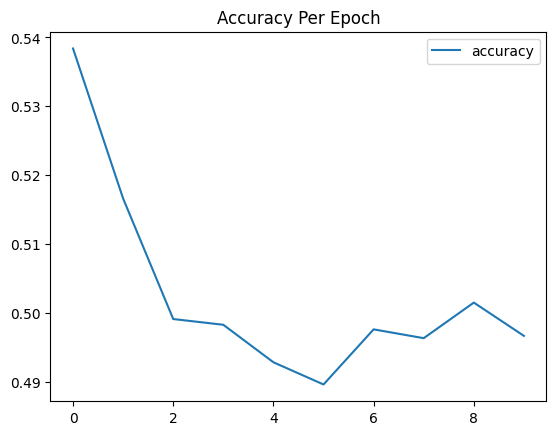

In [ ]:
model_history[['accuracy']].plot()
plt.title('Accuracy Per Epoch')

Text(0.5, 1.0, 'Loss Per Epoch')

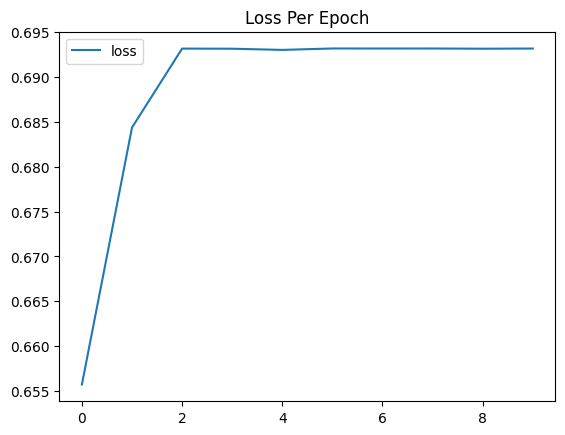

In [ ]:
model_history[['loss']].plot()
plt.title('Loss Per Epoch')

In [ ]:
model2 =keras.models.load_model('/content/gdrive/MyDrive/Info 251 Project/Alberto_model/alberto_fnnmodel2.h5')

In [ ]:
model2_history= model2.fit(
        train_generator,
        steps_per_epoch= train_generator.samples // train_generator.batch_size,
        epochs=10,
        validation_data=validation_generator,
        validation_steps = validation_generator.samples // validation_generator.batch_size)

Epoch 1/10
720/720 [==============================] - 46s 62ms/step - loss: 0.5888 - accuracy: 0.7119 - val_loss: 0.6321 - val_accuracy: 0.6720
Epoch 2/10
720/720 [==============================] - 39s 54ms/step - loss: 0.5588 - accuracy: 0.7191 - val_loss: 0.5388 - val_accuracy: 0.7305
Epoch 3/10
720/720 [==============================] - 41s 57ms/step - loss: 0.5431 - accuracy: 0.7309 - val_loss: 0.7400 - val_accuracy: 0.6145
Epoch 4/10
720/720 [==============================] - 40s 56ms/step - loss: 0.5213 - accuracy: 0.7427 - val_loss: 0.5441 - val_accuracy: 0.7285
Epoch 5/10
720/720 [==============================] - 40s 55ms/step - loss: 0.5244 - accuracy: 0.7415 - val_loss: 0.7152 - val_accuracy: 0.6340
Epoch 6/10
720/720 [==============================] - 40s 56ms/step - loss: 0.5514 - accuracy: 0.7091 - val_loss: 0.6147 - val_accuracy: 0.6645
Epoch 7/10
720/720 [==============================] - 38s 53ms/step - loss: 0.5228 - accuracy: 0.7409 - val_loss: 0.5420 - val_accuracy:

In [ ]:
# NN_models1 = Sequential()
# NN_models1.add(Dense(units =10 , input_dim=(X_values_3.shape[1]), activation='softmax'))
# NN_models1.add(Dropout(0.2))
# NN_models1.add(Dense(units = training_off_y.shape[1], activation='sigmoid'))
# NN_models1.add(Dropout(0.2))
# NN_models1.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy']) 
# hist = NN_models1.fit(training_no_target, training_off_y, epochs=150, batch_size=25, shuffle = True, verbose = 0) 

In [ ]:
# densenet = DenseNet121( weights=None, include_top=False, input_shape=(128,128,1) )

# model = keras.Sequential([ 
#         densenet,
#         layers.GlobalAveragePooling2D(),
#         layers.Dense(1, activation='sigmoid')
#     ])

# model.compile(loss='binary_crossentropy', optimizer= Adam() , metrics=['accuracy'])


# model.summary()

In [ ]:
# define model
# model1 = Sequential()
# model1.add(Conv2D(filters=64, kernel_size=(3,3), strides = 1, activation='relu',
#                  input_shape=(128,128,1))) 

# model1.add(MaxPooling2D(pool_size=(2, 2)))

# model1.add(Flatten())
# model1.add(Dense(8, activation='relu'))
# model1.add(Dense(1, activation='sigmoid'))
# opt = Adam(learning_rate=0.000001)
# model1.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy']) 

In [ ]:
# plt.imread(dataset["image_path"][2])

In [ ]:
# Image.fromarray(dataset["image_path"][2])

In [ ]:
# dataset["image_path"][2]

In [ ]:
# a=Image.fromarray(plt.imread(dataset["image_path"][0]))

In [ ]:
# b=a.convert("L")

In [ ]:
# np.array(b).shape

(256, 256)

In [ ]:
# grey_image = np.array(b)
# scalar = StandardScaler()

In [ ]:
#  X = scalar.fit_transform(grey_image).reshape([1,-1])
#  X.shape

In [ ]:
# dataset = df.copy()

In [ ]:
# len(dataset)

20000

In [ ]:
# X_values = np.empty((0,256*256))

# for i in range(len(dataset)):
# # for i in range(100):
#     #img = np.array(Image.open(path+'/'+lst[i]+'/'+dataset['image_name'][i])) # Makes it into array from photo
#     img = plt.imread(dataset["image_path"][i]) # Makes it into array from photo
#     image = Image.fromarray(img) # make it into a colored photo
#     grey_image = image.convert("L")
#     grey_image_values = np.array(grey_image)
#     scalar = StandardScaler()
#     X = scalar.fit_transform(grey_image_values).reshape([1,-1])
#     X_values = np.append(X_values, X,axis=0)
#     print

In [ ]:
# type(X_values)

numpy.ndarray

In [ ]:
# amount_of_cluster_points = 4 # CHANGE
# x, y = make_blobs(n_samples=300, n_features=2, centers=amount_of_cluster_points, cluster_std=1, random_state=0)
# def k_means_alg(x,amount_of_iterations):
#     centroid_index_x = np.random.choice(len(x), amount_of_cluster_points, replace=False)
#     centroids = x[centroid_index_x,:]
#     min_dist_cent_points = pairwise_distances_argmin_min(x,centroids,metric='euclidean')[0]
    
#     for iteration in range(amount_of_iterations):
#         update_centroid = np.zeros([amount_of_cluster_points,x.shape[1]])
#         for i in range(amount_of_cluster_points):
#             update_centroid[i] = x[min_dist_cent_points == i].mean(axis=0)
    
#         b = pairwise_distances_argmin_min(x,update_centroid,metric='euclidean')
#         min_dist_cent_points = b[0]
    
#     closest_image_idx = pairwise_distances_argmin_min(update_centroid,x,metric='euclidean')[0]
#     closest_image = x[closest_image_idx]
#     return update_centroid, closest_image

In [ ]:
# from sklearn.cluster import KMeans
# KMeans(n_clusters=2, random_state=0, n_init="auto").fit(X_values)

KMeans(n_clusters=2, n_init='auto', random_state=0)

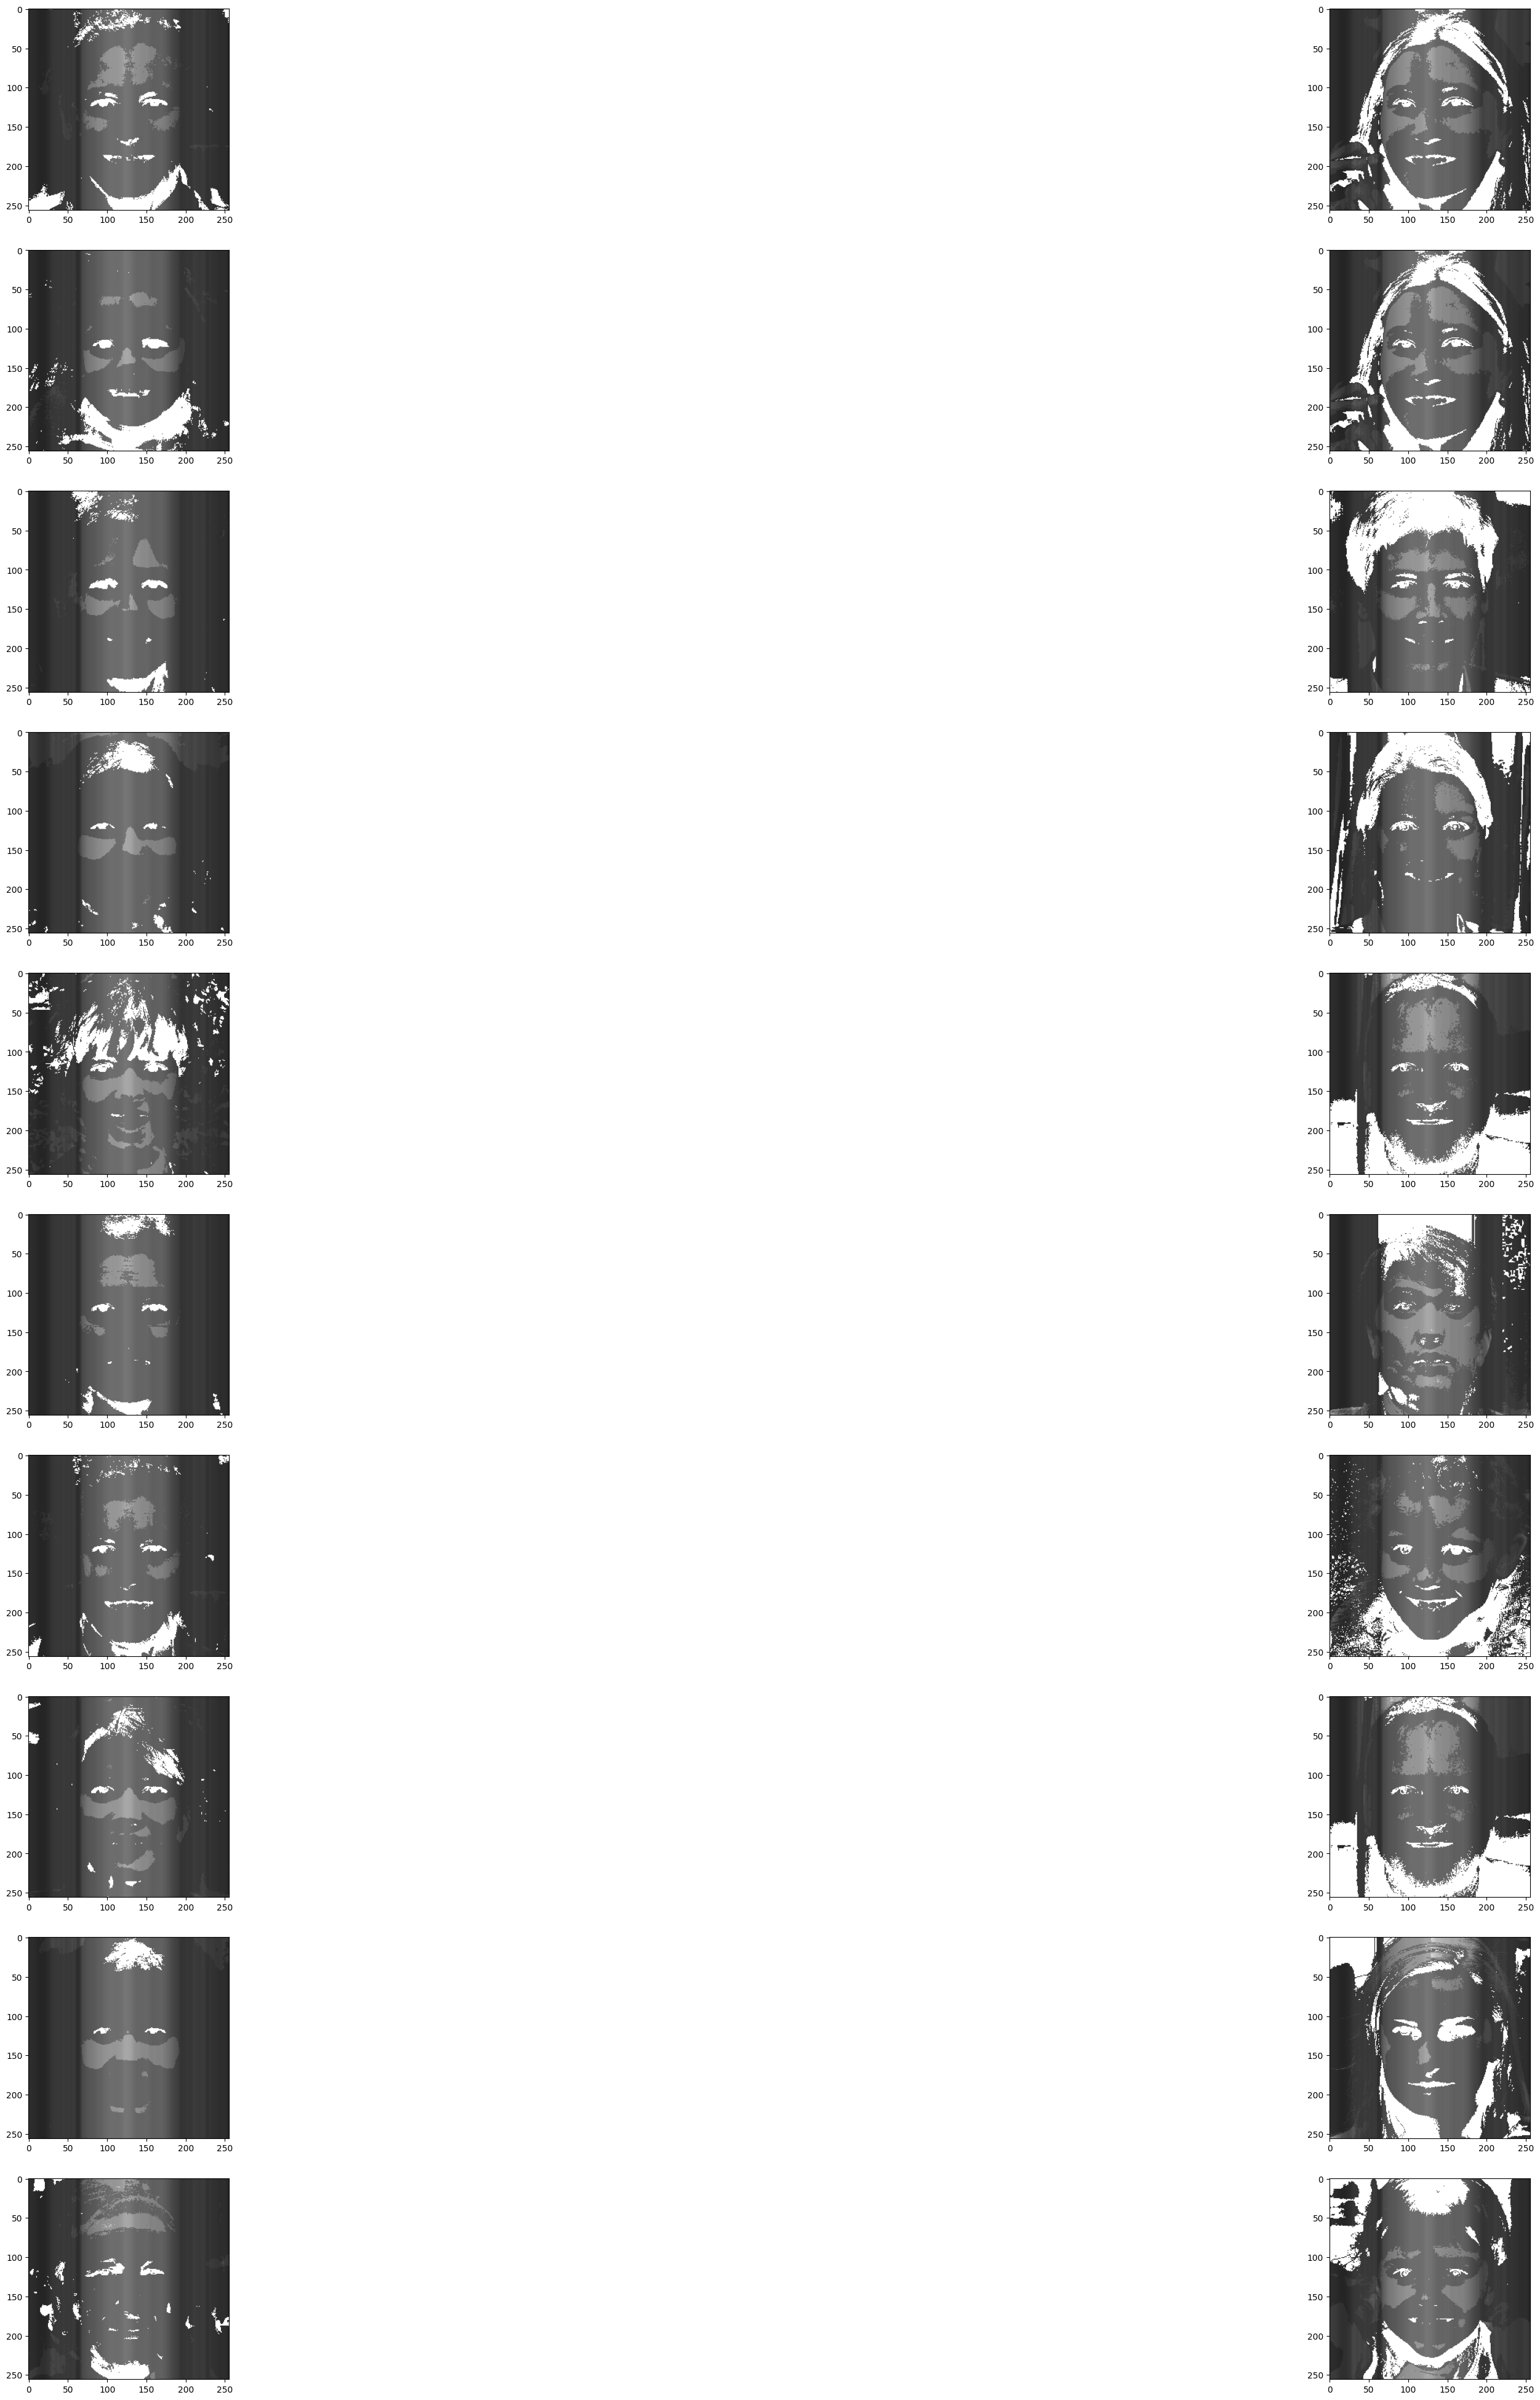

In [ ]:
# f, axarr = plt.subplots(10,2, figsize=(50,50))
# for i in range(10):
#     amount_of_cluster_points = 10
#     c,u  = k_means_alg(X_values,10) # c is my list of centroids, u is the closest to the centroid
#     c = c.reshape(-1,256,256) # all centroid
#     c = c.astype('uint8')
#     a = Image.fromarray(c[0]) # plot first centroid
#     a_values = np.array(a)
#     d = scalar.inverse_transform(a_values)
#     image1 = Image.fromarray(d) # make it into a colored photo
#     color_image_centroid = image1.convert("RGB")
    
#     amount_of_cluster_points = 10
#     c,u  = k_means_alg(X_values,10) # c is my list of centroids, u is the closest to the centroid
#     u = u.reshape(-1,256,256) # all centroid
#     u = u.astype('uint8')
#     b = Image.fromarray(u[0]) # plot first centroid
#     b_values = np.array(b)
#     e = scalar.inverse_transform(b_values)
    
#     image2 = Image.fromarray(e) # make it into a colored photo
#     color_image_centroid_near = image2.convert("RGB")
#     color_image_centroid_near
#     axarr[i,0].imshow(color_image_centroid)
#     axarr[i,1].imshow(color_image_centroid_near);

In [ ]:
# dataset.head()

,image_path,image_name,image_folder
0,/content/real_vs_fake/real-vs-fake/test/fake/3...,3D5K3AAM2V.jpg,fake
1,/content/real_vs_fake/real-vs-fake/test/fake/I...,IDKRCU2ZSO.jpg,fake
2,/content/real_vs_fake/real-vs-fake/test/fake/F...,F3QMOK0SFW.jpg,fake
3,/content/real_vs_fake/real-vs-fake/test/fake/5...,5TEKQYC5Y7.jpg,fake
4,/content/real_vs_fake/real-vs-fake/test/fake/W...,WQ7L8VHHYR.jpg,fake


In [ ]:
# z = pd.get_dummies(dataset.image_folder, prefix='N')
# filtered_data_processed = pd.concat([dataset, z], axis = 1)
# # filtered_data_processed = filtered_data_processed.drop(['Name'], axis=1)
# filtered_data_processed.head()

,image_path,image_name,image_folder,N_fake,N_real
0,/content/real_vs_fake/real-vs-fake/test/fake/3...,3D5K3AAM2V.jpg,fake,1,0
1,/content/real_vs_fake/real-vs-fake/test/fake/I...,IDKRCU2ZSO.jpg,fake,1,0
2,/content/real_vs_fake/real-vs-fake/test/fake/F...,F3QMOK0SFW.jpg,fake,1,0
3,/content/real_vs_fake/real-vs-fake/test/fake/5...,5TEKQYC5Y7.jpg,fake,1,0
4,/content/real_vs_fake/real-vs-fake/test/fake/W...,WQ7L8VHHYR.jpg,fake,1,0


In [ ]:
# img.reshape([1,-1]).reshape(256,256,3).shape

(256, 256, 3)

In [ ]:
# img.shape

(256, 256, 3)

In [ ]:
# X_values_new = np.empty((0,256*256*3))

# for i in range(len(filtered_data_processed)):
# # for i in range(100):
#     #img = np.array(Image.open(path+'/'+lst[i]+'/'+dataset['image_name'][i])) # Makes it into array from photo
#     # img = np.array(Image.open(filtered_data_processed['image_folder'].iloc[i])) # Makes it into array from photo
#     #image = Image.fromarray(img) # make it into a colored photo
#     #grey_image = image.convert("L")
#     #grey_image_values = np.array(grey_image)
#     img = plt.imread(dataset["image_path"][i]) # Makes it into array from photo
#     # image = Image.fromarray(img) # make it into a colored photo
#     # grey_image = image.convert("L")
#     # grey_image_values = np.array(grey_image)
#     reshape_img = img.reshape([1,-1])
#     scalar = StandardScaler()
#     X = scalar.fit_transform(reshape_img)
#     X_values_new = np.append(X_values_new, X,axis=0)



KeyboardInterrupt: ignored

In [ ]:
# filtered_data_processed_labels = pd.concat([filtered_data_processed, pd.DataFrame(X_values_new)], axis=1)

NameError: ignored

In [ ]:
# from sklearn.model_selection import train_test_split
# training, testing = train_test_split(filtered_data_processed_labels, shuffle=True, test_size=0.5, random_state = 42)
# training

In [ ]:
# res =  training_random[training_random==1].stack().reset_index().drop(0, axis=1)
# res

In [ ]:
# res['level_2'] = res['level_1'].sample(frac=1).values
# res

In [ ]:
# from sklearn.metrics import accuracy_score
# accuracy_score(res['level_1'], res['level_2'])

In [ ]:
# from sklearn.metrics import classification_report
 
# print(classification_report(res['level_1'], res['level_2']))

In [ ]:
# res_2 =  testing_random[testing_random==1].stack().reset_index().drop(0, axis=1)
# res_2

In [ ]:
# res_2['level_2'] = res_2['level_1'].sample(frac=1).values

NameError: ignored

In [ ]:
# from sklearn.metrics import accuracy_score
# accuracy_score(res_2['level_1'], res_2['level_2'])

In [ ]:
# from sklearn.metrics import classification_report
 
# print(classification_report(res_2['level_1'], res_2['level_2']))